## 使用sklearn转换器处理数据

#### 加载datasets模块中数据集

In [4]:
from sklearn.datasets import load_breast_cancer     # 导入乳腺癌患者数据
cancer = load_breast_cancer()     # 实例化对象
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer['data'].shape
cancer['target'].shape
print(cancer['DESCR'])
cancer['filename']

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

'C:\\Users\\zhang\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

In [6]:
from sklearn.datasets import load_iris    # 导入鸢尾花数据
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
iris['data'].shape
iris['target'].shape

(150,)

#### 将数据集划分为训练集和测试集

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
iris = load_iris()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, stratify=iris['target'])  # 拆分数据

In [10]:
X_train.shape
pd.Series(y_train).value_counts()

2    40
1    40
0    40
dtype: int64

#### sklearn转换器

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, stratify=iris['target'])

In [12]:
min_max_scaler = MinMaxScaler().fit(X_train)   # 利用训练集数据生成转化器

In [13]:
min_max_scaler.transform(X_train)   # 对训练集数据执行转化操作
min_max_scaler.transform(X_test)    # 对测试集数据执行转化操作

array([[0.33333333, 0.13636364, 0.50847458, 0.5       ],
       [0.44444444, 0.54545455, 0.6440678 , 0.70833333],
       [0.5       , 0.40909091, 0.62711864, 0.54166667],
       [0.61111111, 0.45454545, 0.81355932, 0.875     ],
       [0.55555556, 0.13636364, 0.57627119, 0.5       ],
       [0.55555556, 0.63636364, 0.77966102, 0.95833333],
       [0.55555556, 0.22727273, 0.6779661 , 0.75      ],
       [0.58333333, 0.5       , 0.76271186, 0.70833333],
       [0.55555556, 0.31818182, 0.66101695, 0.70833333],
       [0.30555556, 0.77272727, 0.08474576, 0.04166667],
       [0.13888889, 0.45454545, 0.06779661, 0.        ],
       [0.08333333, 0.54545455, 0.06779661, 0.04166667],
       [0.63888889, 0.40909091, 0.61016949, 0.5       ],
       [0.58333333, 0.54545455, 0.72881356, 0.91666667],
       [0.30555556, 0.63636364, 0.08474576, 0.125     ],
       [0.30555556, 0.86363636, 0.05084746, 0.125     ],
       [0.72222222, 0.5       , 0.74576271, 0.83333333],
       [0.66666667, 0.22727273,

In [14]:
MinMaxScaler().fit_transform(X_train)

array([[0.66666667, 0.59090909, 0.79661017, 0.83333333],
       [0.66666667, 0.5       , 0.57627119, 0.54166667],
       [0.41666667, 0.31818182, 0.69491525, 0.75      ],
       [1.        , 0.81818182, 0.91525424, 0.79166667],
       [0.86111111, 0.36363636, 0.86440678, 0.75      ],
       [0.47222222, 0.63636364, 0.59322034, 0.625     ],
       [0.08333333, 0.5       , 0.08474576, 0.04166667],
       [0.83333333, 0.40909091, 0.89830508, 0.70833333],
       [0.19444444, 0.72727273, 0.06779661, 0.04166667],
       [0.33333333, 0.68181818, 0.05084746, 0.04166667],
       [0.25      , 0.95454545, 0.08474576, 0.        ],
       [0.58333333, 0.36363636, 0.77966102, 0.83333333],
       [0.66666667, 0.5       , 0.62711864, 0.58333333],
       [0.30555556, 0.63636364, 0.11864407, 0.04166667],
       [0.5       , 0.36363636, 0.50847458, 0.5       ],
       [0.38888889, 0.27272727, 0.42372881, 0.375     ],
       [0.22222222, 0.68181818, 0.06779661, 0.08333333],
       [0.41666667, 0.90909091,

## 构建并评价聚类模型

In [15]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris = load_iris()

k_means = KMeans(n_clusters=3)    # 实例化K-Means聚类算法类
k_means.fit(iris['data'])         # 执行聚类操作

k_means.labels_              # 各样本聚类标签
k_means.cluster_centers_     # 各类中心

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
from sklearn.metrics import adjusted_rand_score, silhouette_score
# help(adjusted_rand_score)
adjusted_rand_score(iris['target'], k_means.labels_)   # 利用兰德系数对聚类模型进行效果评估

0.7302382722834697

In [17]:
silhouette_score(iris['data'], k_means.labels_)

0.5528190123564091

iris数据聚2类calinski_harabaz指数为：0.681046
iris数据聚3类calinski_harabaz指数为：0.552819
iris数据聚4类calinski_harabaz指数为：0.498051
iris数据聚5类calinski_harabaz指数为：0.488749
iris数据聚6类calinski_harabaz指数为：0.359943


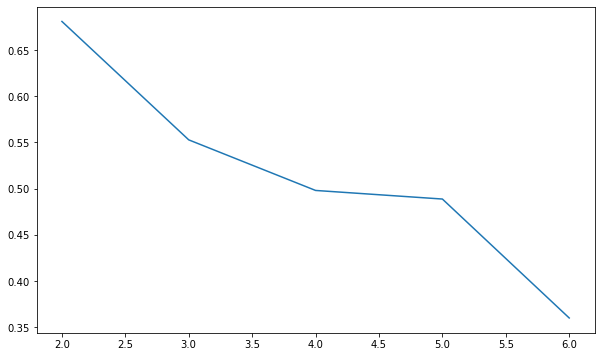

In [18]:
import matplotlib.pyplot as plt
scores = []
for k in range(2,7):
    ##构建并训练模型
    kmeans = KMeans(n_clusters=k, random_state=123).fit(iris['data'])
    score = silhouette_score(iris['data'], kmeans.labels_)
    scores.append(score)
    print('iris数据聚%d类calinski_harabaz指数为：%f'%(k,score))

plt.figure(figsize=(10,6))
plt.plot(range(2,7),scores,linewidth=1.5, linestyle="-")
plt.show()

## 构建并评价分类模型

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris(return_X_y=True)

In [20]:
X = iris[0]
y = iris[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [21]:
clf = DecisionTreeClassifier()    # 实例化决策树分类器
clf.fit(X_train, y_train)         # 训练模型

DecisionTreeClassifier()

In [22]:
print(clf.classes_)
print(clf.feature_importances_)

[0 1 2]
[0.03333333 0.         0.0607589  0.90590776]


In [23]:
predicted = clf.predict(X_test)    # 调用模型对测试样本的标签进行预测

In [24]:
# 评价分类模型的性能
from sklearn.metrics import classification_report
print(predicted)
print(y_test)
(predicted == y_test).mean()    # 模型精确率（accuracy）

report = classification_report(y_test, predicted)
print(report)

[1 0 2 1 1 0 0 1 1 1 2 2 0 0 1 0 2 2 2 1 0 0 2 2 0 2 1 1 0 2]
[1 0 2 1 1 0 0 1 1 1 2 2 0 0 1 0 2 2 2 1 0 0 2 2 0 2 1 1 0 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 构建并评价回归模型

In [25]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
boston = load_boston()

In [26]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [27]:
# print(boston['DESCR'])   
boston['data'].shape
boston['target'].shape

(506,)

In [28]:
X_train, X_test, y_train, y_test = \
train_test_split(boston['data'], boston['target'], test_size=0.2)

In [29]:
model = LinearRegression().fit(X_train, y_train)   # 模型训练

In [30]:
model.coef_            # 系数项
model.intercept_       # 截距项

36.0118790299223

#### 评价回归模型

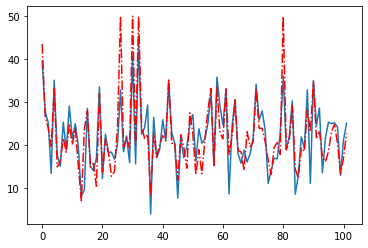

In [31]:
import matplotlib.pyplot as plt
predicted = model.predict(X_test)

plt.figure()
plt.plot(range(len(y_test)), predicted)
plt.plot(range(len(y_test)), y_test, 'r-.')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_test, predicted)   # 计算均方误差

20.434952943172025